# This notebook contains the following:

1. import libraries / path / data
   
3. address security implications
   
5. regional segmentaion
   
    a. region columns

    b. determine spending habits between U.S regions
   
6. exclusion flag for low-activity customer (less than 5 orders)
   
8. customer profiling
   
    a. age
   
    b. income
   
    c. number of dependants
   
11. visulizations
    
    a. age groups
    
    b. income groups
    
    c. customer with dependants
    
14. aggregate max, mean, & min for use frequency & expenditure
    
    a. age group
    
    b. income group
    
    c. customers with dependants group
    
17. compare customers with regions and departments
    
    a. region
    
    b. department sales
    
    c. frequency

20. visualizations for 8 a-c
    
    

#  1. Import libraries / path / data

In [4]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# create path
path = r'C:\Users\TypicalPancake\DA Instacart Basket Analysis 12-2024'

In [6]:
# import dataframe
ords_prods_cust = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_merge.pkl'))

# 2. Address security implications

Security implications would require a restriction of access to sensitive data (authorized personnel w/ access credentials). 
Encryption of data would help further increase the security for PII. 
Adhere to GDPR & CCPA laws to ensure correct storing of personal information.

# 3. Regional segmentaion a. region columns b. determine spending habits between U.S regions

#   3.a Creating region columns

In [11]:
# previewing
print(ords_prods_cust.head())

   order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered _merge  \
0                     NaN         196                  1          0   both   
1                     NaN       14084                  2          0   both   
2                     NaN       12427                  3          0   both   
3                     NaN       26088                  4          0   both   
4                     NaN       26405                  5          0   both   

   ...   order_frequency_flag  first_name  last_name  gender    stat

In [12]:
# labeling northeast region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maine', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Hampshire', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Vermont', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Pennsylvania', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Massachusetts', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Rhode Island', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Connecticut', 'region'] = 'Northeast'

In [13]:
# labeling midwest region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wisconsin', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Michigan', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Illinois', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Indiana', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Ohio', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nebraska', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kansas', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Minnesota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Iowa', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Missouri', 'region'] = 'Midwest'

In [14]:
# labeling south region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Delaware', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maryland', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'District of Columbia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'West Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Georgia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Florida', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kentucky', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Tennessee', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Mississippi', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alabama', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oklahoma', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Texas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arkansas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Louisiana', 'region'] = 'South'

In [15]:
# labeling west region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Idaho', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Montana', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wyoming', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nevada', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Utah', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Colorado', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arizona', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Mexico', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alaska', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Washington', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oregon', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'California', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Hawaii', 'region'] = 'West'

In [16]:
# previewing
print(ords_prods_cust.head())

   order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered _merge  \
0                     NaN         196                  1          0   both   
1                     NaN       14084                  2          0   both   
2                     NaN       12427                  3          0   both   
3                     NaN       26088                  4          0   both   
4                     NaN       26405                  5          0   both   

   ... first_name  last_name  gender    state age date_joined  \
0  

# 3.b Determine spending habits 

In [18]:
# creating crosstab of regions
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna = False)

In [19]:
# crosstab to clipboard
crosstab.to_clipboard()

In [20]:
# previewing
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest               29265      7568060
Northeast             13799      4445262
South                 40579     10751306
West                  31223      8261690
NaN                    4843      1258832


In [21]:
# exporting
ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

# 4. Exclusion flag for low-activity customer (less than 5 orders)

In [23]:
# creating flag for cusomter who have less than 5 order
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [24]:
ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [25]:
# exclude the low order customers
df_excluded = ords_prods_cust[ords_prods_cust['activity_flag'] != 'low-activity customer']

In [26]:
# exporting 
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# 5. Customer profiling a. age b. income c. number of dependants

# 5.a Age profiling

In [29]:
# creating profile group for age
df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 64, 'age_group'] = 'senior'

C:\Users\TypicalPancake\AppData\Local\Temp\ipykernel_69500\3845124731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'


In [30]:
# previewing
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

# 5.b Income profiling

In [32]:
# creating profile group for income
df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 55000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

C:\Users\TypicalPancake\AppData\Local\Temp\ipykernel_69500\2312369187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'


In [33]:
# previewing
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    22617642
low-income        4452388
high-income       3894534
Name: count, dtype: int64

# 5.c Dependant profiling

In [35]:
# creating profile group for dependants
df_excluded.loc[df_excluded['number_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['number_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

C:\Users\TypicalPancake\AppData\Local\Temp\ipykernel_69500\2631502194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['number_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [36]:
# previewing
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

In [37]:
# exporting dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# 6. Visulizations a. age groups b. income groups c. customer with dependants

# 6.a Age visualization

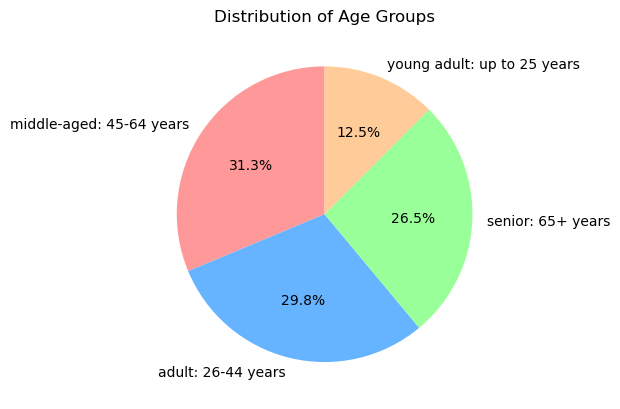

In [40]:
# creating pie chart
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

# 6.b Income visualization

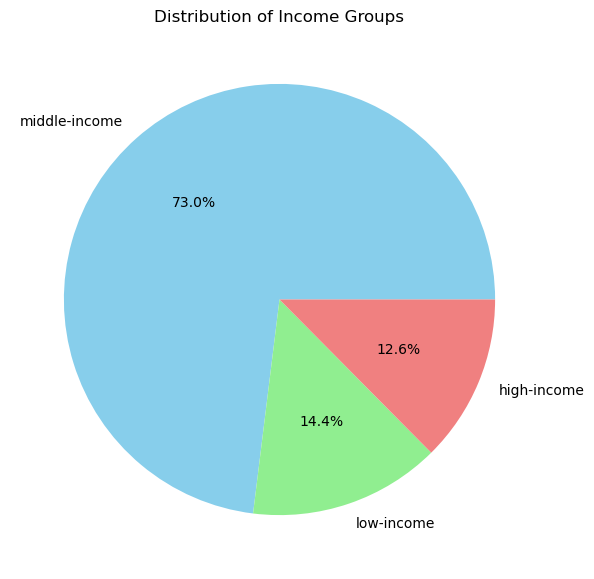

In [42]:
# creating pie chart 2
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_pie = income_group_counts.plot.pie(autopct='%1.1f%%', figsize=(7, 7), colors=['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightsalmon'])
plt.title('Distribution of Income Groups')
plt.ylabel('')  
plt.show()

# 6.c Dependants visualization

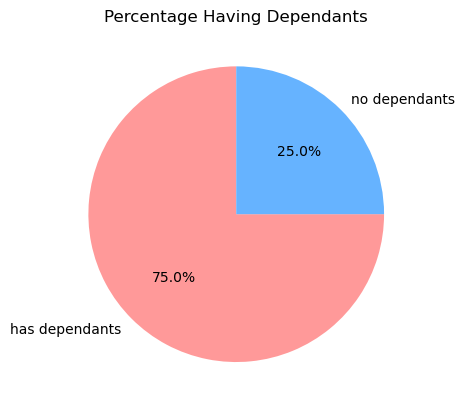

In [44]:
# creating pie chart 3
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

In [45]:
# exporting visualizations
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))
income_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_piebar.png'))
dependants_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'percentage_dependants_pie.png'))

# 7.Aggregate max, mean, & min for use frequency & expenditure

In [47]:
print(df_excluded.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_dependants', 'family_status', 'income',
       'region', 'activity_flag', 'age_group', 'income_group',
       'dependants_flag'],
      dtype='object')


In [48]:
# creating customerprofiles in subset
customer_profile = df_excluded.groupby(['user_id', 'state', 'region', 'number_dependants', 'family_status', 'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'order_frequency_flag', 'dependants_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [49]:
#previewing
customer_profile.head()

,user_id,state,region,number_dependants,family_status,age_group,order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,order_frequency_flag,dependants_flag,income_group,spending_flag,prices
0,1,Alabama,South,3,married,adult,1,2,8,New customer,Non-frequent customer,has dependants,low-income,Low spender,31.6
1,1,Alabama,South,3,married,adult,2,3,7,New customer,Non-frequent customer,has dependants,low-income,Low spender,35.4
2,1,Alabama,South,3,married,adult,3,3,12,New customer,Non-frequent customer,has dependants,low-income,Low spender,28.2
3,1,Alabama,South,3,married,adult,4,4,7,New customer,Non-frequent customer,has dependants,low-income,Low spender,26.0
4,1,Alabama,South,3,married,adult,5,4,15,New customer,Non-frequent customer,has dependants,low-income,Low spender,57.0


In [50]:
# aggregating expenditure customer profile
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [51]:
#previewing
customer_agg

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   1   5.5   63.1   25.0   37.570000
2                 14   1   7.5  213.1   19.0  104.685714
3                 12   1   6.5  107.2   30.7   60.116667
4                  5   1   3.0   63.4   10.8   29.540000
7                 20   1  10.5  166.7    6.3   76.910000
...              ...  ..   ...    ...    ...         ...
206203             5   1   3.0  216.3  126.6  169.900000
206206            67   1  34.0  157.3    9.6   32.526866
206207            16   1   8.5  200.8   42.8  101.931250
206208            49   1  25.0  238.5   38.7  115.595918
206209            13   1   7.0  131.5   11.1   70.046154

[156301 rows x 6 columns]

In [52]:
# aggregating frequency customer profile
freq_agg = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [53]:
freq_agg

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
7                 20   1   9.645631                   30.0   2.0  13.546392
...              ...  ..        ...                    ...   ...        ...
206203             5   1   2.983193                   30.0  27.0  29.103093
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[162631 rows x 6 columns]

# 8. & 9. Compare customers with regions and departments a. region b. department sales c. frequency. / Visualizations

# 8.a Customer files by departments

In [56]:
# importing department names 
departments = pd.read_csv(os.path.join(path,'02 Data','Original Data','departments.csv'))

In [57]:
# previewing
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [58]:
print(departments.columns)

Index(['department_id', 'department'], dtype='object')


In [59]:
# merging
df_excluded_with_dept = pd.merge(df_excluded, departments[['department_id', 'department']], on='department_id', how='left')

In [60]:
df_excluded_with_dept.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,date_joined,number_dependants,family_status,income,region,activity_flag,age_group,income_group,dependants_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,both,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependants,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependants,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependants,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependants,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependants,household


In [61]:
print(df_excluded_with_dept.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_dependants', 'family_status', 'income',
       'region', 'activity_flag', 'age_group', 'income_group',
       'dependants_flag', 'department'],
      dtype='object')


In [62]:
# creating crosstab
region_dept_cross = pd.crosstab(df_excluded_with_dept['region'], df_excluded_with_dept['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,20120,56872,155882,364615,92420,4471,137738,711976,139808,111939,...,96810,35265,91595,8970,4926,244582,58664,13150,1239418,384202
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329
NaN,4897,15840,43418,98314,25484,1128,39198,202640,38590,31878,...,27794,9413,26976,2542,1342,68149,16101,4584,353586,108952


In [63]:
# Total sum of the dataset
total_sum = region_dept_cross.sum().sum()

In [64]:
# previewing
total_sum

30964564

In [65]:
# previewing
print(region_dept_cross.index)

Index(['Midwest', 'Northeast', 'South', 'West', nan], dtype='object', name='region')


In [66]:
# calculating sum of 'nan' row
nan_row = region_dept_cross[pd.isnull(region_dept_cross.index)]

In [67]:
nan_sum = nan_row.sum().sum()

In [68]:
print(f"NaN Sum: {nan_sum}")

NaN Sum: 1204798


In [69]:
nan_row_main = df_excluded_with_dept[pd.isnull(df_excluded_with_dept.index)]

In [70]:
nan_sum_main = nan_row.sum().sum()

In [71]:
print(f"NaN Sum: {nan_sum_main}")

NaN Sum: 1204798


Decided to remove 'Nan' from data (3.8% of total)

In [73]:
region_dept_cross_cleaned = region_dept_cross[~pd.isnull(region_dept_cross.index)]

In [74]:
region_dept_cross_cleaned

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,20120,56872,155882,364615,92420,4471,137738,711976,139808,111939,...,96810,35265,91595,8970,4926,244582,58664,13150,1239418,384202
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


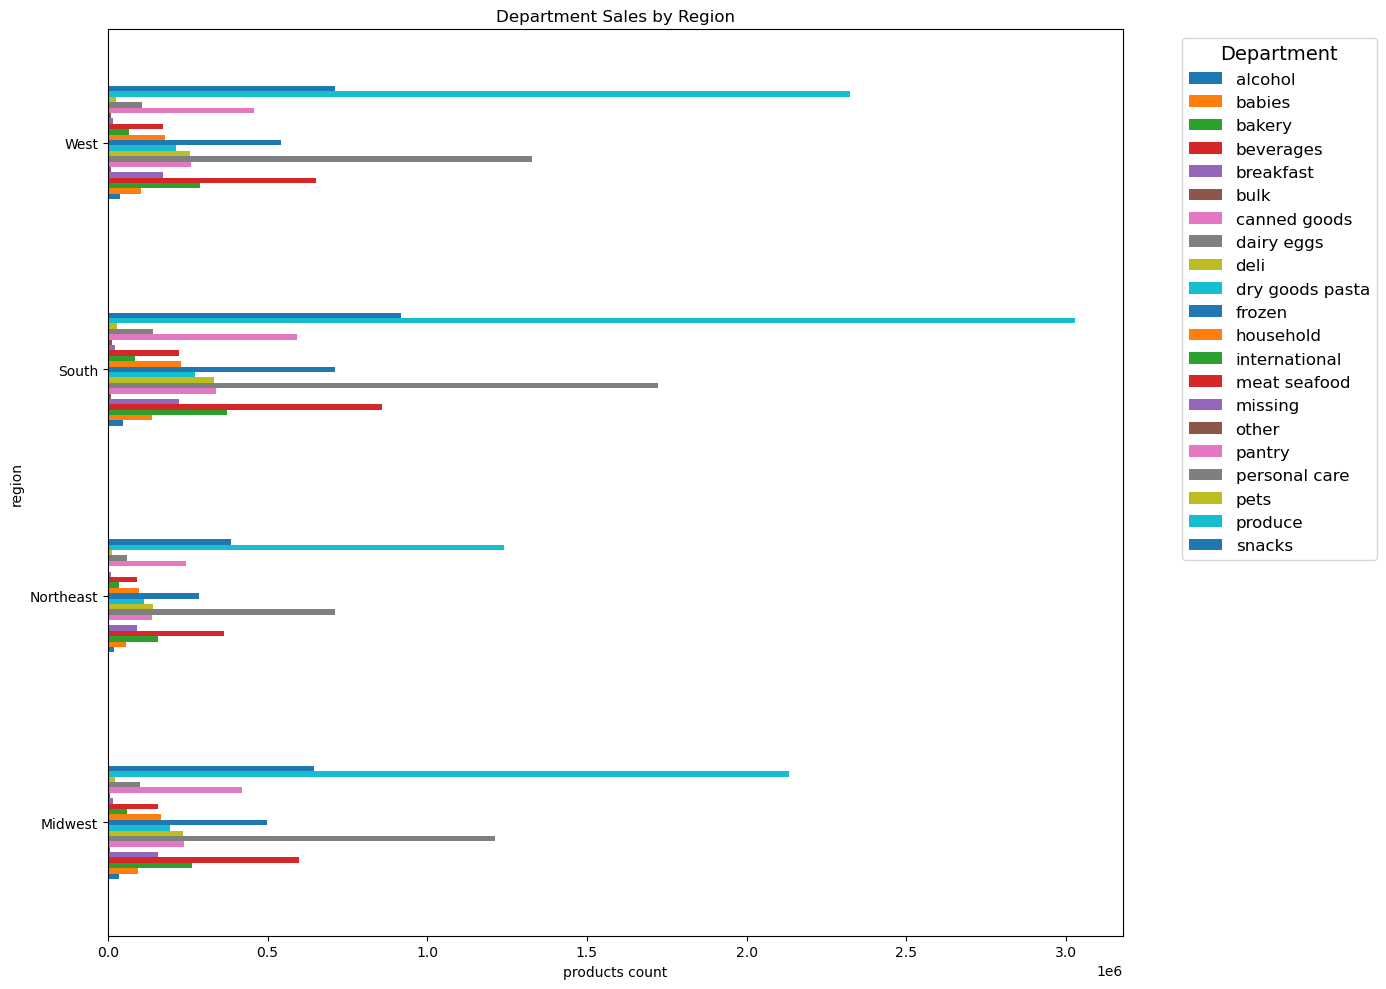

<Figure size 640x480 with 0 Axes>

In [180]:
# creating bar chart
region_dept_bar = region_dept_cross_cleaned.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig('department_sales_by_region_bar_fixed.png', dpi=300, bbox_inches='tight')

In [182]:
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_sales_by_region_bar'))

In [77]:
# export data
region_dept_cross_cleaned.to_pickle(os.path.join(path,'02 Data','Prepared Data','region_dept_cross_cleaned.pkl'))

In [78]:
df_excluded_with_dept.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_departments_cleaned.pkl'))

In [79]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments_cleaned.pkl'))

Text(0.5, 0, '')

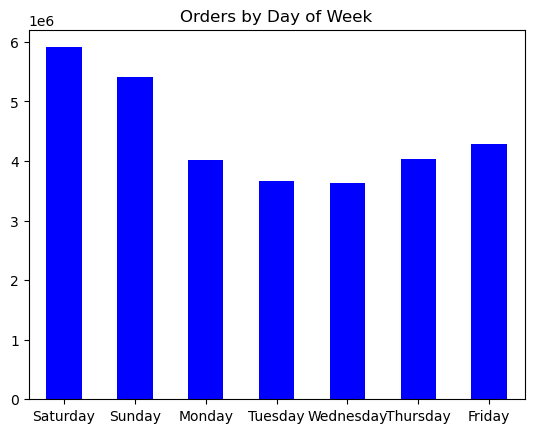

In [80]:
# creating bar chart
orders_dow_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [81]:
# export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

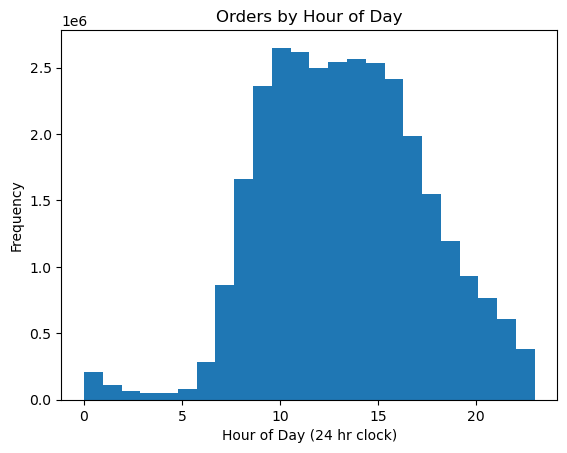

In [82]:
# histogram of hours of the day
hod_hist=df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [83]:
# export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_day_hist.png'))

In [84]:
# creating crosstab for loyalty with age group
loyalty_income_cross = pd.crosstab(df['loyalty_flag'], df['income_group'], dropna = False)
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal customer,1310941,1381467,7591685
New customer,575272,798804,3429619
Regular customer,2008321,2272117,11596338


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

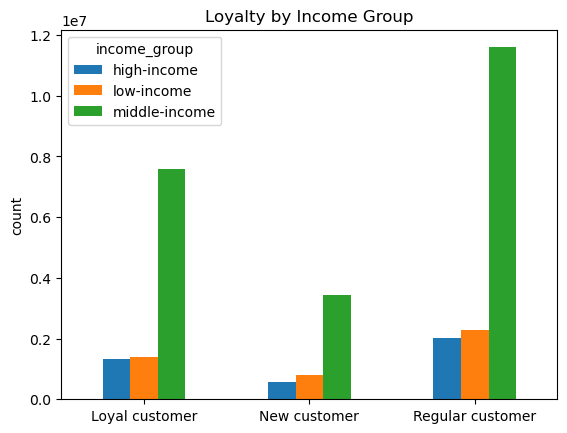

In [85]:
# creating bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [86]:
# export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [87]:
# creating crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)
loyalty_spender_cross

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,13896,10270197
New customer,36362,4767333
Regular customer,47185,15829591


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

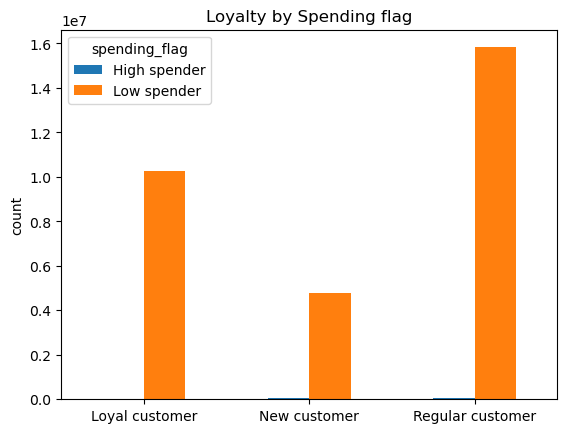

In [88]:
# creating bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spending flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [89]:
# export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending_bar.png'))

In [90]:
# creating crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['family_status'], dropna = False)
loyalty_fam_cross

family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,403781,221779,3380651,797484
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

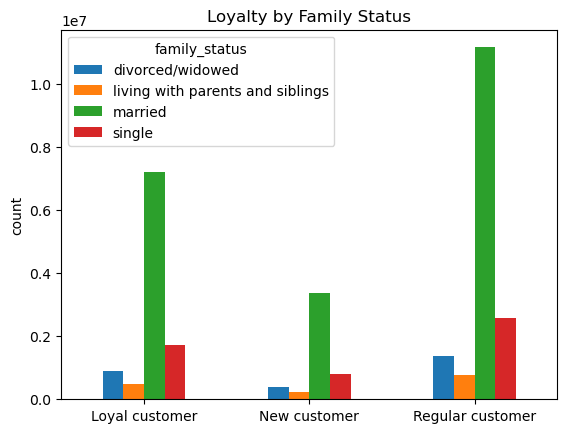

In [91]:
# creating bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [92]:
# export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_family_bar.png'))

In [93]:
# creating crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(df['loyalty_flag'], df['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,7695249,2588844
New customer,3602430,1201265
Regular customer,11927204,3949572


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

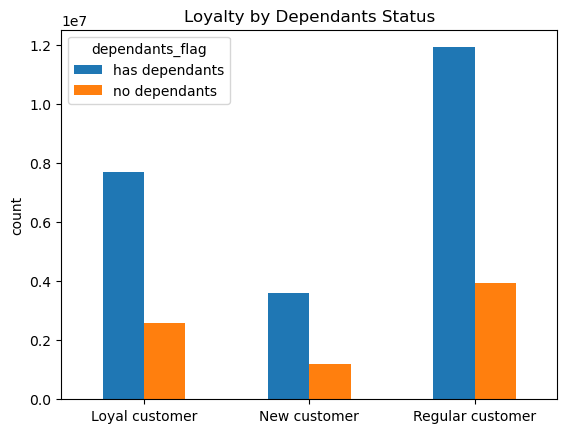

In [94]:
# creating bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [95]:
# export bar chart
loyalty_depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dependants_bar.png'))

In [96]:
# checking value counts
fam_status = df['family_status'].value_counts(dropna = False)
fam_status

family_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

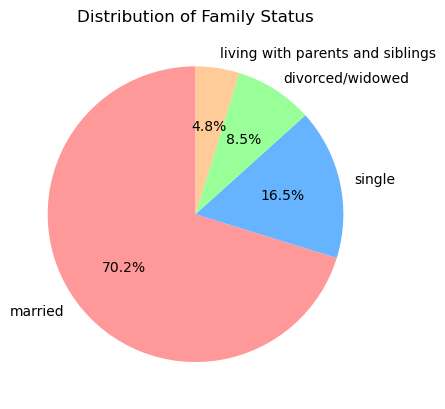

In [97]:
# creating pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [98]:
# export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_bar.png'))